In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/lung-disease'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/623.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/764.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/1075.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/771.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/208.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/820.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/473.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/1031.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/333.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/1024.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/537.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/45.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/369.jpg
/kaggle/in

In [2]:
!pip install img2vec_pytorch


In [6]:
pip install img2vec-pytorch


Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
import pandas as pd
from matplotlib.image import imread
import matplotlib.pyplot as plt
import plotly.express as px
from img2vec_pytorch import Img2Vec
from PIL import Image
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth', None)

In [8]:
Lung_Opacity = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity"
Normal = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal"
Viral_Pneumonia = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Viral Pneumonia"

file_paths = [os.path.join(Lung_Opacity, f) for f in os.listdir(Lung_Opacity)] + [os.path.join(Normal, f) for f in os.listdir(Normal)] + [os.path.join(Viral_Pneumonia, f) for f in os.listdir(Viral_Pneumonia)]

labels = ['Lung Opacity'] * len(os.listdir(Lung_Opacity)) + ['Normal'] * len(os.listdir(Normal)) + ['Viral Pneumonia'] * len(os.listdir(Viral_Pneumonia))

df = pd.DataFrame({'file_path': file_paths, 'label': labels})

df.sample(10)

,file_path,label
1020,/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/517.jpg,Lung Opacity
1240,/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/237.jpg,Normal
2095,/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/1187.jpg,Normal
1281,/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/806.jpg,Normal
2172,/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/941.jpg,Normal
1878,/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/72.jpg,Normal
2173,/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/655.jpg,Normal
3444,/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Viral Pneumonia/315.jpg,Viral Pneumonia
3040,/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Viral Pneumonia/1068.jpg,Viral Pneumonia
2365,/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/754.jpg,Normal


In [9]:
plt.figure(figsize=(15, 10))
px.pie(df, names='label',title="Disease Distribution",  color_discrete_sequence=["#ff7740","#4ec200","#0084c2"])

<Figure size 1500x1000 with 0 Axes>

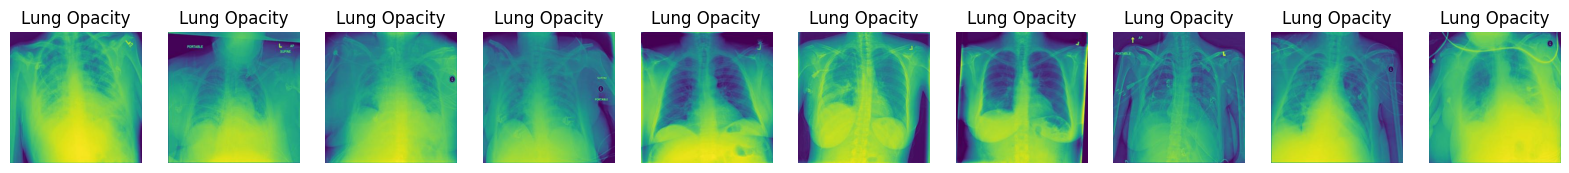

In [28]:
fig, axs = plt.subplots(1, 10, figsize=(20, 20))

for i in range(1, 11):
    file_name = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/" + str(i) + ".jpg"
    image = imread(file_name)
    ax = axs[i-1]
    ax.set_title("Lung Opacity")
    ax.imshow(image)
    ax.axis('off') 
    
plt.show()

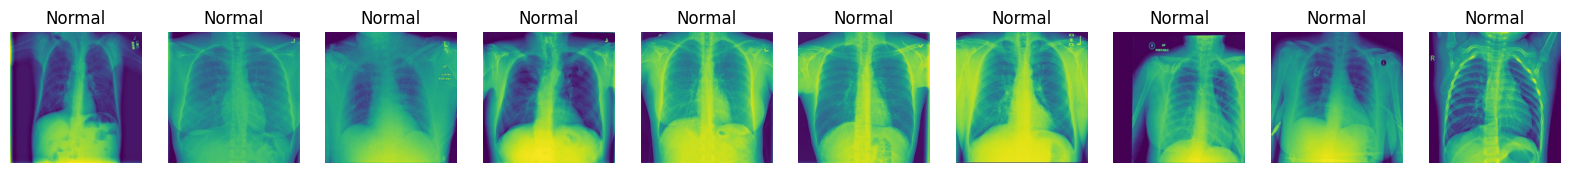

In [8]:
fig, axs = plt.subplots(1, 10, figsize=(20, 20))

for i in range(1, 11):
    file_name = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/" + str(i) + ".jpg"
    image = imread(file_name)
    ax = axs[i-1]
    ax.set_title("Normal")
    ax.imshow(image)
    ax.axis('off')
    
plt.show()

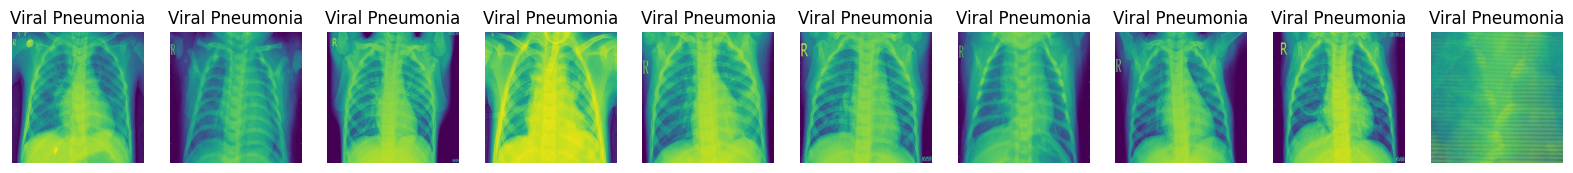

In [9]:

fig, axs = plt.subplots(1, 10, figsize=(20, 20))

for i in range(1, 11):
    file_name = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Viral Pneumonia/" + str(i) + ".jpg"
    image = imread(file_name)
    ax = axs[i-1]
    ax.set_title("Viral Pneumonia")
    ax.imshow(image)
    ax.axis('off')
    
plt.show()

In [10]:
vectorizor = Img2Vec()
df['ImageVector'] = df['file_path'].apply(lambda x: vectorizor.get_vec(Image.open(x), tensor=True).numpy().reshape(512,))

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 158MB/s] 


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3475 entries, 0 to 3474
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   file_path    3475 non-null   object
 1   label        3475 non-null   object
 2   ImageVector  3475 non-null   object
dtypes: object(3)
memory usage: 81.6+ KB


In [18]:
print(df['ImageVector'][0].shape)
print(type(df['ImageVector'][0]))

(512,)
<class 'numpy.ndarray'>


In [19]:
df.head(3)

,file_path,label,ImageVector
0,/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/623.jpg,Lung Opacity,"[2.3529198, 1.002096, 0.41551885, 6.98316, 1.9328959, 0.13151062, 0.6247535, 0.89255315, 1.9978235, 0.2590343, 0.9850067, 0.652417, 0.12794986, 0.4639264, 0.48169678, 0.43311763, 0.21155924, 1.2173034, 0.3628008, 1.1378797, 0.6272956, 0.4055834, 1.4931049, 2.7809396, 1.7128673, 1.8617405, 0.075454086, 0.9357284, 0.56679773, 0.060377523, 0.9873148, 1.6717151, 3.055783, 0.56833005, 0.5603929, 0.43021142, 1.0001166, 0.49324885, 0.5995744, 0.08098882, 0.05236634, 0.7609533, 1.0925385, 0.03500917, 2.044281, 1.4551365, 0.15639095, 1.5487568, 0.9555174, 0.79559, 0.35622835, 0.98071474, 0.5966941, 0.0, 2.0454826, 2.2449312, 1.6388276, 0.72415704, 0.2365319, 1.3050741, 0.4656851, 0.47095832, 0.7217616, 2.7511096, 0.68958354, 1.2838268, 0.43942338, 0.68684995, 3.3061128, 0.19732367, 0.81927794, 1.8865216, 1.9834365, 0.078532174, 1.8113793, 1.2821594, 0.0, 1.0821115, 0.49037683, 0.51716495, 0.5604209, 0.8335995, 0.5349879, 0.05225677, 0.6032574, 0.49578366, 0.4650462, 1.802516, 2.14458, 0.8744065, 1.0581812, 0.34719148, 0.7117429, 1.2818627, 1.3810797, 0.11346664, 1.9400676, 0.31402686, 0.3190978, 1.876257, ...]"
1,/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/764.jpg,Lung Opacity,"[1.3265294, 0.1661642, 1.53196, 6.699752, 1.1047378, 0.01054815, 0.3438685, 1.3084427, 0.98675305, 0.25694463, 0.171985, 0.17542335, 0.54195935, 0.38083455, 1.1464912, 0.17019975, 0.5221491, 0.86981374, 0.8971436, 1.8157995, 0.037609078, 0.648044, 0.66134673, 1.6478719, 1.2171081, 0.22417483, 0.11380113, 0.8358983, 0.73212284, 0.20045432, 1.145303, 1.6216048, 3.1553001, 1.0923566, 0.6767967, 0.16004397, 0.17912465, 0.2548371, 0.949967, 0.789257, 0.063983485, 1.3786495, 1.3520687, 0.0023654406, 1.3499057, 1.2928603, 0.513655, 1.0104259, 0.20454523, 0.645763, 1.1146784, 0.81776756, 0.833354, 0.43445244, 2.3950768, 1.3531147, 1.8840032, 0.38275176, 0.022557624, 2.5558724, 1.4133204, 0.35458016, 1.001852, 0.9320396, 0.18387549, 1.0078944, 0.32450762, 0.32932827, 5.074896, 0.16035858, 1.3362564, 1.9942071, 1.5661459, 0.08884595, 0.9621018, 2.8956082, 0.1438827, 0.7912091, 0.14656183, 0.9729781, 0.011060687, 2.1177955, 0.99333274, 0.42991844, 0.21917428, 0.044388752, 0.7238877, 1.6084316, 1.4847474, 0.9418357, 0.41711116, 0.17246646, 0.011040854, 1.3269131, 0.51466227, 0.031331647, 0.45184156, 0.46447042, 0.2077735, 1.9375688, ...]"
2,/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1075.jpg,Lung Opacity,"[0.7209872, 0.006230716, 0.059369788, 6.080218, 0.77111053, 0.53500193, 0.36710486, 0.58525753, 2.2837768, 0.19086394, 0.903006, 1.7293944, 0.40718704, 1.0224494, 0.9877592, 0.42598698, 0.4246075, 1.6954337, 1.0352994, 0.2593494, 0.03860121, 0.26573333, 0.449401, 1.6706972, 0.689757, 0.8002775, 0.1716666, 0.7978293, 1.4780384, 0.2803499, 1.0157529, 1.5704966, 3.3690908, 0.4903684, 0.48729652, 0.61023045, 0.08753256, 0.3726336, 1.0589935, 0.19007748, 0.05869153, 0.859095, 1.1182153, 0.1639461, 2.2833886, 0.6899669, 0.08581956, 0.60467464, 1.1129934, 0.55784965, 1.1261476, 1.8658477, 0.050921038, 0.10849203, 3.5414462, 0.86998224, 2.0349233, 0.4901872, 0.4747868, 1.3675175, 0.2882597, 0.044354476, 1.0807731, 2.5237284, 0.33255053, 0.77767164, 0.37102097, 0.59001994, 3.9842772, 0.004891538, 1.1885238, 3.4012089, 1.4996123, 0.2392677, 1.6832961, 2.1108818, 0.090711944, 0.8270646, 0.49357843, 1.106534, 0.05652857, 0.42168677, 1.4559278, 0.049333192, 0.9118207, 0.07966159, 0.59744513, 1.4132684, 1.7745697, 0.5682615, 1.0495732, 0.30505228, 0.45967892, 2.2601993, 0.4160849, 0.31024802, 1.9873606, 0.019794168, 0.48149607, 1.0322328, ...]"


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df['ImageVector'].apply(pd.Series), df['label'], test_size=0.2, random_state=42)

In [28]:
model = make_pipeline(
    MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=10000), 
    memory='cache'
)

In [29]:
model.fit(X_train, y_train)

Pipeline(memory='cache',
         steps=[('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=10000))])

In [30]:
y_pred = model.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred, digits=4))

                 precision    recall  f1-score   support

   Lung Opacity     0.8862    0.8790    0.8826       248
         Normal     0.8571    0.8824    0.8696       238
Viral Pneumonia     1.0000    0.9761    0.9879       209

       accuracy                         0.9094       695
      macro avg     0.9144    0.9125    0.9133       695
   weighted avg     0.9105    0.9094    0.9098       695



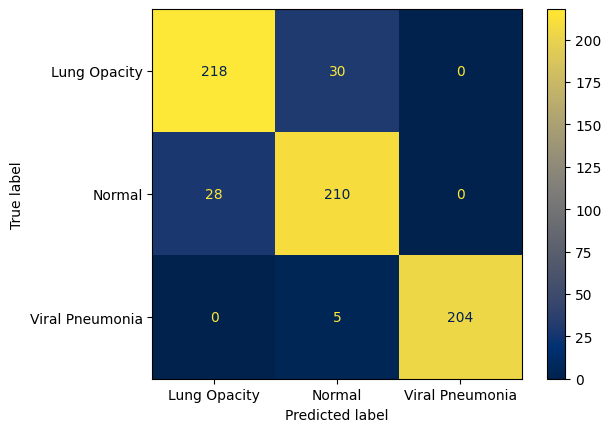

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='cividis')

                 precision    recall  f1-score   support

   Lung Opacity     0.8811    0.8669    0.8740       248
         Normal     0.8394    0.8782    0.8583       238
Viral Pneumonia     1.0000    0.9665    0.9830       209

       accuracy                         0.9007       695
      macro avg     0.9068    0.9039    0.9051       695
   weighted avg     0.9026    0.9007    0.9014       695



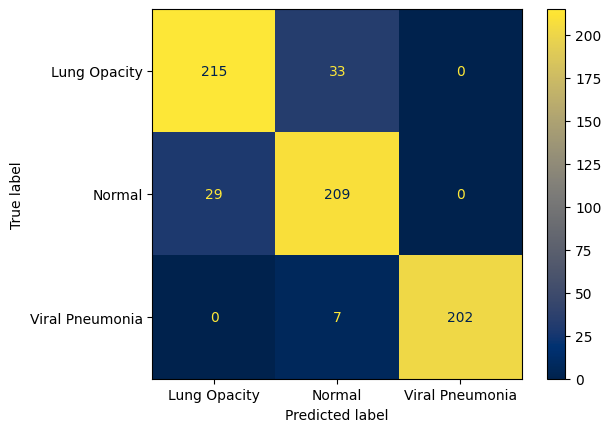

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import numpy as np

class ChannelAttention(nn.Module):
    def __init__(self, in_channels, reduction=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.fc = nn.Sequential(
            nn.Conv2d(in_channels, in_channels // reduction, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(in_channels // reduction, in_channels, 1, bias=False)
        )
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        return self.sigmoid(avg_out + max_out)

class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=(kernel_size - 1) // 2, bias=False)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x = torch.cat([avg_out, max_out], dim=1)
        return self.sigmoid(self.conv(x))

class CBAM(nn.Module):
    def __init__(self, in_channels, reduction=16, kernel_size=7):
        super(CBAM, self).__init__()
        self.channel_att = ChannelAttention(in_channels, reduction)
        self.spatial_att = SpatialAttention(kernel_size)
    
    def forward(self, x):
        x = x * self.channel_att(x)
        x = x * self.spatial_att(x)
        return x

def plot_classification_report(y_true, y_pred, labels):
    y_true = y_true.cpu().numpy() if isinstance(y_true, torch.Tensor) else np.array(y_true)
    y_pred = y_pred.cpu().numpy() if isinstance(y_pred, torch.Tensor) else np.array(y_pred)
    
    print(classification_report(y_true, y_pred, target_names=labels))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# CNN Attention Layer Model Pipeline
model = make_pipeline(
    MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=10000), 
    memory='cache'
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='cividis')
